# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


# Preprocess Data

In [4]:
df.shape

(37249, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


### Drop Null values

In [5]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

### Eliminate duplicates

In [7]:
df.duplicated().sum()

np.int64(350)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Removes all the lines which just contains whitespaces or new lines

In [9]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [10]:
df = df[~(df['clean_comment'].str.strip() == '')]

### Convert all the comments to lowercase

In [11]:
df['clean_comment'] = df['clean_comment'].str.lower()

df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


### Eliminate comments containing new lines

In [12]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

comments_with_newline.head()

,clean_comment,category
106,pretty sure this sarcasm satire the news 1500...,1
217,lots streams this site vietnam arsenal html\n,0
317,the govt should have only one religion says t...,0
448,what missing jpg\nand why this brilliant edit ...,1
495,you wondering whether girl will get through t...,1


### Remove Unwanted Characters

In [13]:
df['clean_comment'] = df['clean_comment'].str.replace(r'[^A-Za-z0-9\s!?.,]', '', regex=True)

### Remove Stopwords (except sentiment-related)

In [14]:
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

df[['clean_comment']].head()


,clean_comment
0,family mormon never tried explain still stare ...
1,buddhism much lot compatible christianity espe...
2,seriously say thing first get complex explain ...
3,learned want teach different focus goal not wr...
4,benefit may want read living buddha living chr...


### Lemmatization

In [15]:
lemmatizer = WordNetLemmatizer()
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df[['clean_comment']].head()

,clean_comment
0,family mormon never tried explain still stare ...
1,buddhism much lot compatible christianity espe...
2,seriously say thing first get complex explain ...
3,learned want teach different focus goal not wr...
4,benefit may want read living buddha living chr...


In [33]:
df = df[df['clean_comment'].str.strip().astype(bool)]

# Export Preprocessed Data

In [34]:
df.to_csv('../data/reddit_preprocessed.csv', index=False)

# EDA

<Axes: xlabel='category', ylabel='percent'>

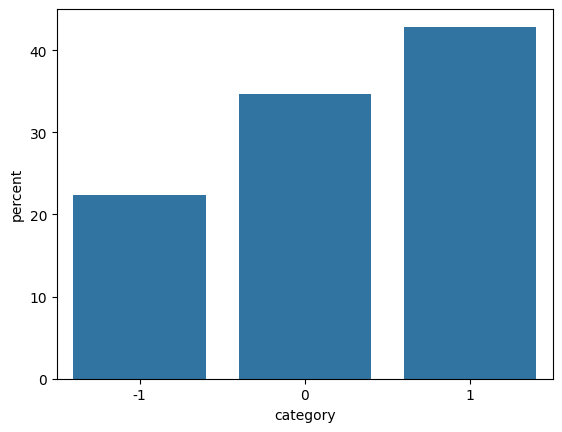

In [ ]:
sns.countplot(data=df, x='category', stat='percent')

In [ ]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df['num_chars'] = df['clean_comment'].apply(len)

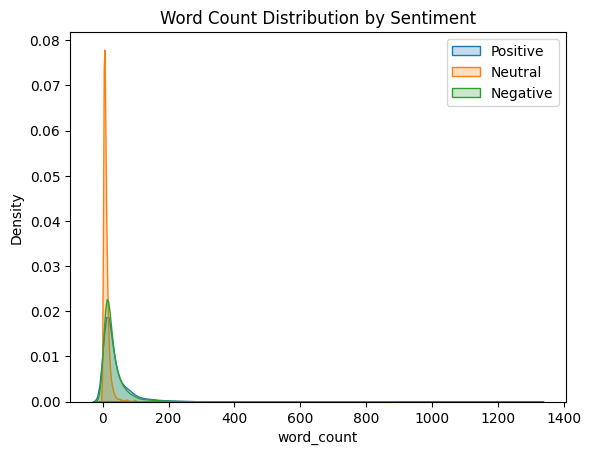

In [35]:
sns.kdeplot(df[df['category']==1]['word_count'], label='Positive', fill=True)
sns.kdeplot(df[df['category']==0]['word_count'], label='Neutral', fill=True)
sns.kdeplot(df[df['category']==-1]['word_count'], label='Negative', fill=True)
plt.legend()
plt.title('Word Count Distribution by Sentiment')
plt.show()

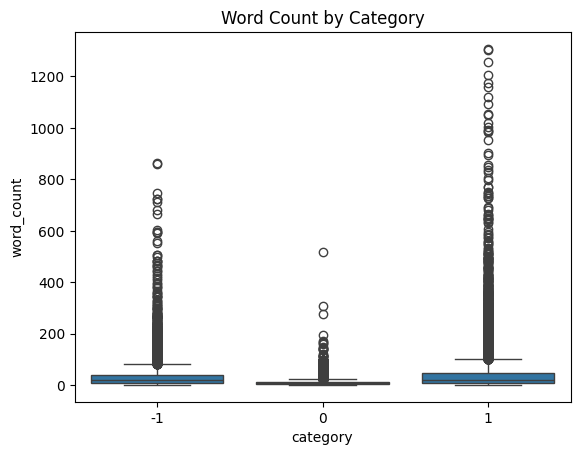

In [34]:
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Word Count by Category')
plt.show()


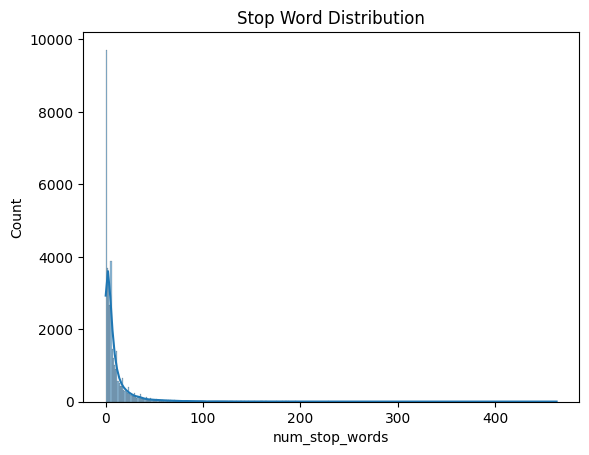

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([w for w in x.split() if w in stop_words]))

sns.histplot(df['num_stop_words'], kde=True)
plt.title("Stop Word Distribution")
plt.show()


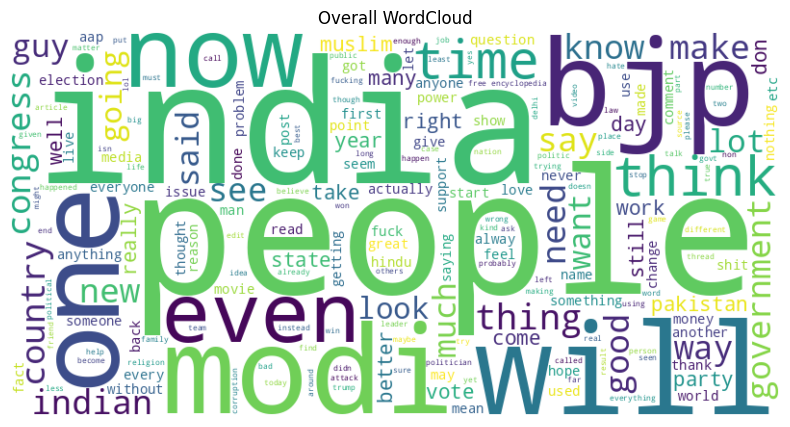

In [33]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df['clean_comment'], "Overall WordCloud")



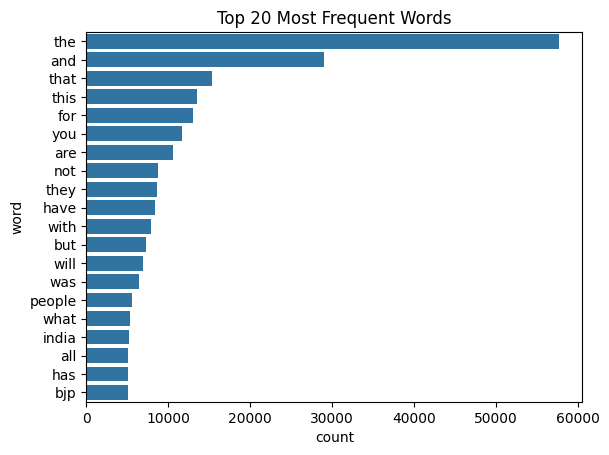

In [32]:
from collections import Counter
counter = Counter(' '.join(df['clean_comment']).split())
common_words = pd.DataFrame(counter.most_common(20), columns=['word','count'])
sns.barplot(data=common_words, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.show()